## Import data and libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [5]:
%matplotlib inline

In [7]:
country_geo = r'C:/Users/rlink/airline industry/02 data/us-states.json'

In [9]:
f = open(r'C:/Users/rlink/airline industry/02 data/us-states.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [16]:
path = 'C:/Users/rlink/Minimum Wage/02 data'

In [24]:
df = pd.read_csv(os.path.join(path, 'Minimum Wage Data 01.csv'))

In [26]:
df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [30]:
df.shape

(2862, 15)

In [32]:
df.isnull().sum()

Year                                                      0
State                                                     0
State.Minimum.Wage                                        0
State.Minimum.Wage.2020.Dollars                           0
Federal.Minimum.Wage                                      0
Federal.Minimum.Wage.2020.Dollars                         0
Effective.Minimum.Wage                                    0
Effective.Minimum.Wage.2020.Dollars                       0
CPI.Average                                               0
Department.Of.Labor.Uncleaned.Data                        0
Department.Of.Labor.Cleaned.Low.Value                     0
Department.Of.Labor.Cleaned.Low.Value.2020.Dollars       15
Department.Of.Labor.Cleaned.High.Value                    0
Department.Of.Labor.Cleaned.High.Value.2020.Dollars      15
Footnote                                               2406
dtype: int64

In [36]:
dups = df.duplicated()

In [38]:
dups.shape

(2862,)

### I did not find any duplicates

In [40]:
df.describe()

,Year,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars
count,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2847.000000,2862.000000,2847.000000
mean,1994.000000,3.754499,6.441635,4.355660,7.991887,4.624333,8.360758,145.417585,3.754499,6.475574,3.877663,6.719726
std,15.299732,2.804826,3.203165,1.959252,0.895547,2.324131,1.128870,69.361536,2.804826,3.177182,2.821064,3.172770
min,1968.000000,0.000000,0.000000,1.150000,6.420000,1.150000,6.420000,34.800000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,1.600000,5.352500,3.350000,7.340000,3.350000,7.610000,90.900000,1.600000,5.415000,1.600000,6.200000
50%,1994.000000,3.350000,7.400000,4.250000,7.900000,4.250000,8.170000,148.200000,3.350000,7.420000,3.350000,7.610000
75%,2007.000000,5.150000,8.450000,5.150000,8.390000,6.550000,8.980000,207.342000,5.150000,8.460000,5.825000,8.600000
max,2020.000000,14.000000,15.610000,7.250000,10.330000,14.000000,15.610000,258.660000,14.000000,15.610000,14.000000,15.610000


### I imputed the 15 missing variables with the median number. 

In [42]:
df.fillna({'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars':7.42},  inplace=True)

In [44]:
df.fillna({'Department.Of.Labor.Cleaned.High.Value.2020.Dollars':7.61},  inplace=True)

In [51]:
df.dtypes

Year                                                     int64
State                                                   object
State.Minimum.Wage                                     float64
State.Minimum.Wage.2020.Dollars                        float64
Federal.Minimum.Wage                                   float64
Federal.Minimum.Wage.2020.Dollars                      float64
Effective.Minimum.Wage                                 float64
Effective.Minimum.Wage.2020.Dollars                    float64
CPI.Average                                            float64
Department.Of.Labor.Uncleaned.Data                      object
Department.Of.Labor.Cleaned.Low.Value                  float64
Department.Of.Labor.Cleaned.Low.Value.2020.Dollars     float64
Department.Of.Labor.Cleaned.High.Value                 float64
Department.Of.Labor.Cleaned.High.Value.2020.Dollars    float64
Footnote                                                object
dtype: object

### I did not find any mixed data types

## Select only the necessary columns and put them in a list called columns

In [57]:
sub = df[['State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average','Department.Of.Labor.Cleaned.Low.Value.2020.Dollars', 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars']]

In [59]:
sub.corr()

,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value.2020.Dollars
State.Minimum.Wage.2020.Dollars,1.000000,0.022723,0.384305,0.155044,0.985914,0.944058
Federal.Minimum.Wage.2020.Dollars,0.022723,1.000000,0.650924,-0.571085,0.032403,0.047164
Effective.Minimum.Wage.2020.Dollars,0.384305,0.650924,1.000000,-0.250694,0.391856,0.381227
CPI.Average,0.155044,-0.571085,-0.250694,1.000000,0.147805,0.132033
Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,0.985914,0.032403,0.391856,0.147805,1.000000,0.957496
Department.Of.Labor.Cleaned.High.Value.2020.Dollars,0.944058,0.047164,0.381227,0.132033,0.957496,1.000000


### Create a correlation heatmap using matplotlib

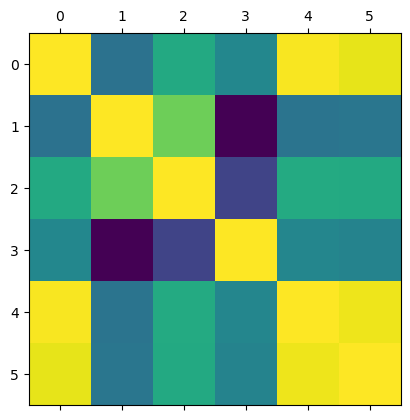

In [66]:
plt.matshow(sub.corr())
plt.show()

### Add labels, a legend, and change the size of the heatmap

Text(0.5, 1.0, 'Correlation Matrix')

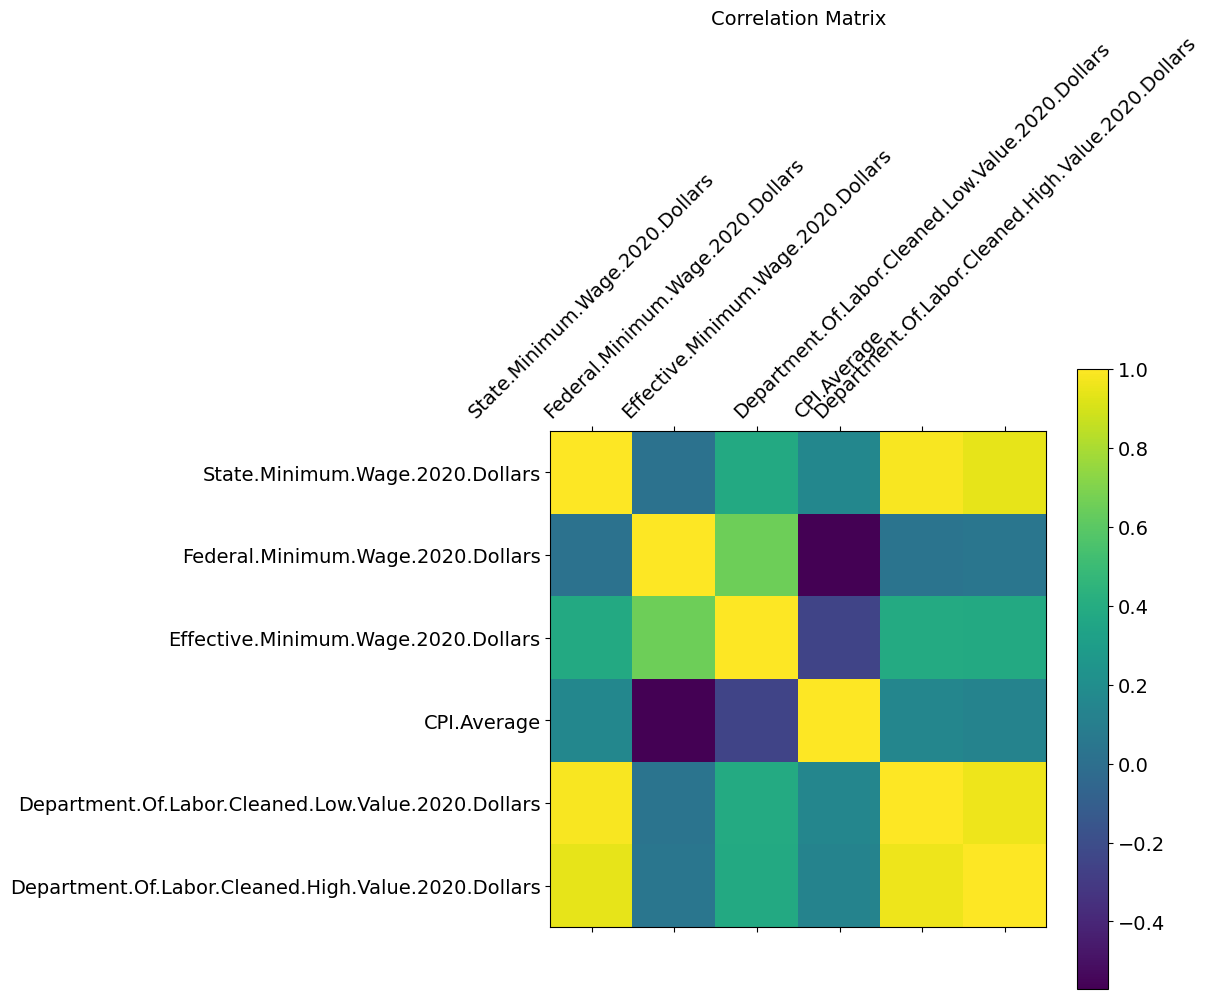

In [69]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a correlation heatmap using seaborn

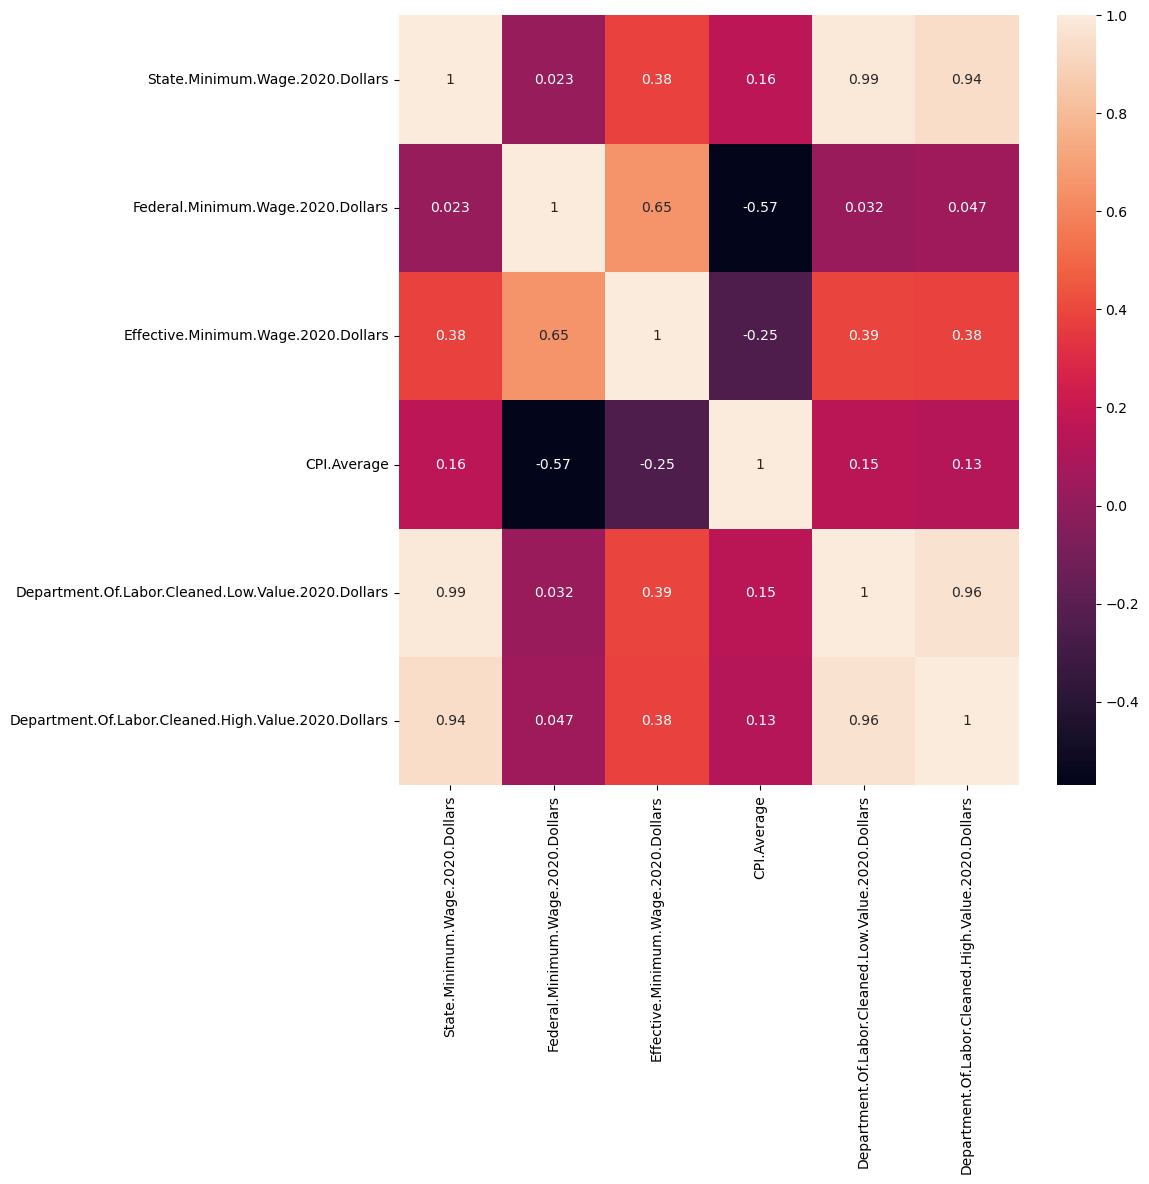

In [72]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### I was not surprised to see that the state minimum wage rate is highly correlcated to the federal rate, but I do find it curious that the Federal Wage and Effective wage are negatively correlated to the CPI. Further, the CPI has low correlation to the state minimum wage rate.

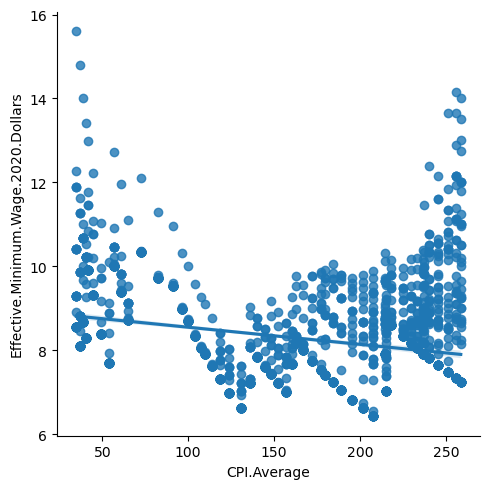

In [75]:
sns.lmplot(x = 'CPI.Average', y = 'Effective.Minimum.Wage.2020.Dollars', data = df)

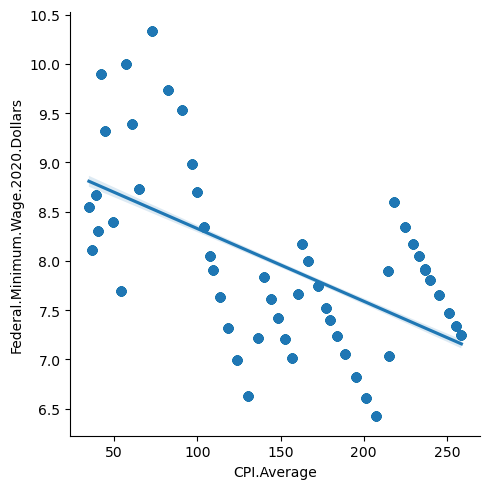

In [77]:
sns.lmplot(x = 'CPI.Average', y = 'Federal.Minimum.Wage.2020.Dollars', data = df)

### As you can see there is not a very tight grouping around either measure against the CPI. While there is a stronger corrlation with the federal minimum wage, there is a very loose grouping.

In [80]:
sub_2 = sub[['CPI.Average', 'Effective.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage.2020.Dollars']]

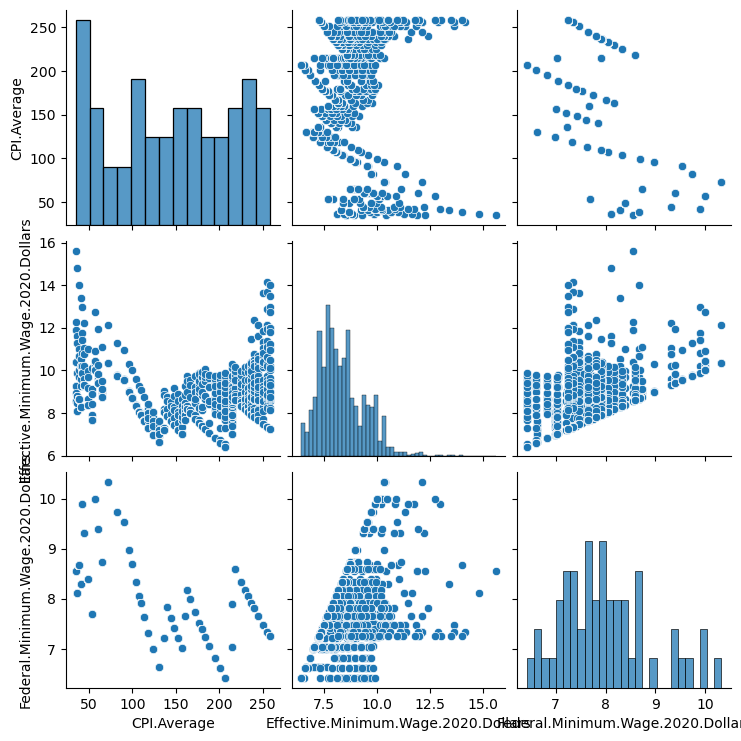

In [82]:
g = sns.pairplot(sub_2)

### Categorical Plots
#### Create a categorical variable that splits the "fare" column into categories

<Axes: xlabel='CPI.Average', ylabel='Count'>

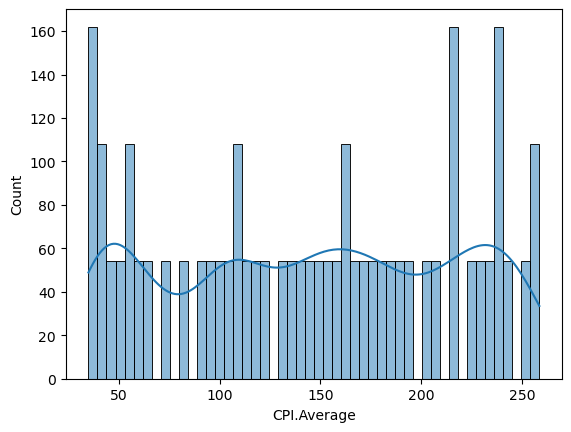

In [87]:
sns.histplot(df['CPI.Average'], bins = 50, kde = True)

<Axes: xlabel='Effective.Minimum.Wage.2020.Dollars', ylabel='Count'>

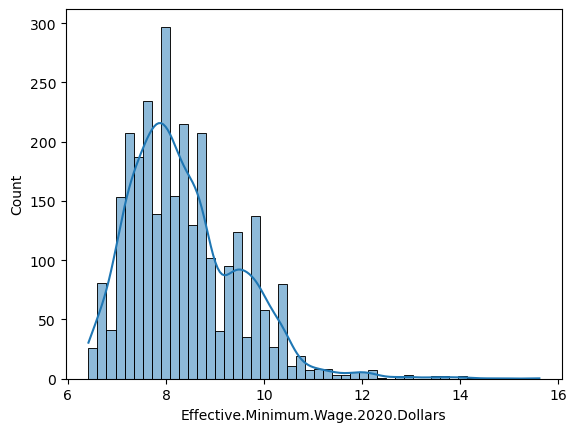

In [89]:
sns.histplot(df['Effective.Minimum.Wage.2020.Dollars'], bins = 50, kde = True)

<Axes: xlabel='Federal.Minimum.Wage.2020.Dollars', ylabel='Count'>

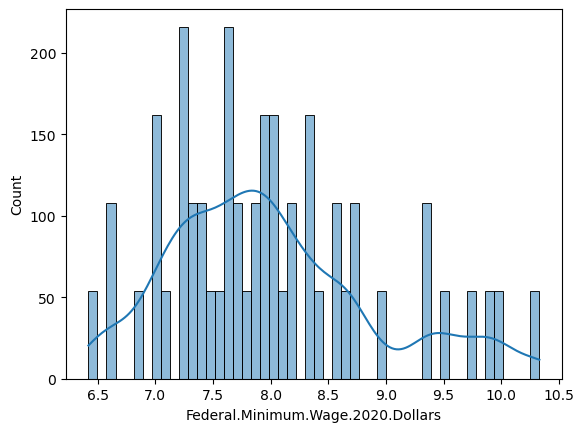

In [91]:
sns.histplot(df['Federal.Minimum.Wage.2020.Dollars'], bins = 50, kde = True)

## Plot a choropleth
### Create a data frame with just the states and the values for rating we want plotted

In [100]:
data_to_plot = df[['State','State.Minimum.Wage.2020.Dollars']]
data_to_plot.head()

,State,State.Minimum.Wage.2020.Dollars
0,Alabama,0.00
1,Alaska,15.61
2,Arizona,3.48
3,Arkansas,1.16
4,California,12.26


In [102]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'State.Minimum.Wage.2020.Dollars'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "State.Minimum.Wage.2020.Dollars").add_to(map)
folium.LayerControl().add_to(map)

map